In [2]:
import numpy as np
import pandas as pd

### 各省的用电量预测

In [2]:
elec=pd.read_csv("../data/production_potential/electricity consumption of province 2020 and 2021.csv",index_col=0)
elec #单位：亿千瓦时

,2020,2021
province,,
Beijing,1140,1233
Tianjin,875,982
Hebei,3934,4294
Shanxi,2342,2608
Inner Mongolia,3900,3957
Liaoning,2423,2576
Jilin,805,843
Heilongjiang,1014,1089
Shanghai,1576,1750


补全缺失

In [3]:
elec.loc['Taiwan','2020']=2400
elec.loc['Hong Kong','2020']=440.975
elec.loc['Macao','2020']=54.149
elec.loc['Taiwan','2021']=2665  #191.9/0.072
elec.loc['Hong Kong','2021']=457.1611
elec.loc['Macao','2021']=56.878
elec=elec/10 #单位：亿千瓦时变为吉瓦时
elec

,2020,2021
province,,
Beijing,114.0000,123.30000
Tianjin,87.5000,98.20000
Hebei,393.4000,429.40000
Shanxi,234.2000,260.80000
Inner Mongolia,390.0000,395.70000
Liaoning,242.3000,257.60000
Jilin,80.5000,84.30000
Heilongjiang,101.4000,108.90000
Shanghai,157.6000,175.00000


In [5]:
elec["ratio"]=(elec["2020"]/(elec["2020"].sum())+elec["2021"]/(elec["2021"].sum()))/2
elec["2060"]=15350*elec["ratio"]  #自上而下的方法，2060年达到约15350吉千瓦时,等比例分配

In [9]:
elec.to_csv("../data/production potential/electricity consumption.csv")

In [13]:
elec=pd.read_csv("../data/production_potential/electricity consumption.csv",index_col=0)
elec

,2020,2021,ratio,2060
province,,,,
Beijing,114.0000,123.30000,0.014425,221.424661
Tianjin,87.5000,98.20000,0.011278,173.113683
Hebei,393.4000,429.40000,0.050005,767.575987
Shanxi,234.2000,260.80000,0.030068,461.541585
Inner Mongolia,390.0000,395.70000,0.047839,734.331988
Liaoning,242.3000,257.60000,0.030401,466.661173
Jilin,80.5000,84.30000,0.010026,153.901541
Heilongjiang,101.4000,108.90000,0.012786,196.266294
Shanghai,157.6000,175.00000,0.020205,310.141181


各省绿电余量=各省可再生能源潜力-各省2060用电量\
产氢上限=绿电余量/每kg氢耗电量

In [19]:
total_potential=pd.read_csv("../data/renewable potential/total_potential.csv",index_col=0)
surplus=total_potential["W_total"]-elec["2060"] #
surplus.drop(index="National",inplace=True)  #单位：吉千瓦时


In [21]:
elec_surplus_demand_ratio=surplus/elec["2060"]
elec_surplus_demand_ratio=elec_surplus_demand_ratio.sort_values(ascending=False)
elec_surplus_demand_ratio=pd.DataFrame(elec_surplus_demand_ratio)
elec_surplus_demand_ratio.columns=["ratio"]
elec_surplus_demand_ratio


,ratio
province,
Tibet,460.858896
Xinjiang,49.075038
Qinghai,45.844917
Inner Mongolia,28.075626
Gansu,17.390969
Heilongjiang,11.220636
Jilin,8.222617
Hainan,7.930428
Ningxia,2.207730


In [22]:
elec_surplus_demand_ratio.to_csv("../data/production_potential/elec_surplus_demand_ratio.csv")

array([[<Axes: title={'center': 'ratio'}>]], dtype=object)

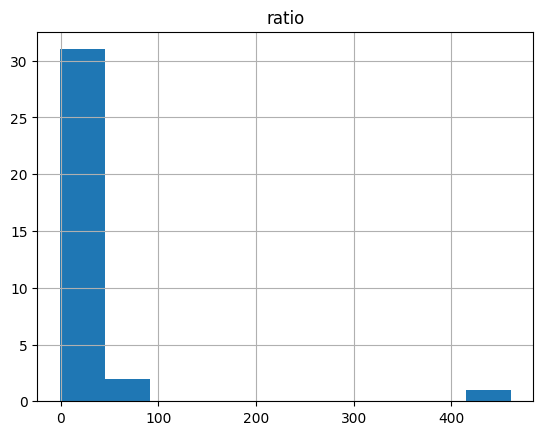

In [25]:
elec_surplus_demand_ratio.hist(bins=10)

电价整理到一个df里

In [35]:
elec_surplus_demand_ratio=pd.read_csv("../data/production_potential/elec_surplus_demand_ratio.csv",index_col=0)
electricity_price=elec_surplus_demand_ratio
electricity_price['rank']=electricity_price['ratio'].rank(ascending=False)
# 将归一化后的排名进行线性变换到区间 [0.1, 1]
electricity_price['big'] = 0.1 + 0.9 * (electricity_price['rank'] - 1) / 33
electricity_price['small']=0.1 + 0.4 * (electricity_price['rank'] - 1) / 33
electricity_price['same']= 0.4
electricity_price

,ratio,rank,big,small,same
province,,,,,
Tibet,460.858896,1.0,0.100000,0.100000,0.4
Xinjiang,49.075038,2.0,0.127273,0.112121,0.4
Qinghai,45.844917,3.0,0.154545,0.124242,0.4
Inner Mongolia,28.075626,4.0,0.181818,0.136364,0.4
Gansu,17.390969,5.0,0.209091,0.148485,0.4
Heilongjiang,11.220636,6.0,0.236364,0.160606,0.4
Jilin,8.222617,7.0,0.263636,0.172727,0.4
Hainan,7.930428,8.0,0.290909,0.184848,0.4
Ningxia,2.207730,9.0,0.318182,0.196970,0.4


In [4]:
electricity_price=pd.read_csv("../data/production_potential/electricity_price.csv",index_col=0)
electricity_price_level=pd.read_csv("../data/production_potential/electricity_price_level.csv",index_col=0)
electricity_price['level']= electricity_price_level['price']
electricity_price

,ratio,rank,big,small,same,level
province,,,,,,
Tibet,460.858896,1.0,0.100000,0.100000,0.4,0.2
Xinjiang,49.075038,2.0,0.127273,0.112121,0.4,0.2
Qinghai,45.844917,3.0,0.154545,0.124242,0.4,0.2
Inner Mongolia,28.075626,4.0,0.181818,0.136364,0.4,0.2
Gansu,17.390969,5.0,0.209091,0.148485,0.4,0.2
Heilongjiang,11.220636,6.0,0.236364,0.160606,0.4,0.3
Jilin,8.222617,7.0,0.263636,0.172727,0.4,0.3
Hainan,7.930428,8.0,0.290909,0.184848,0.4,0.3
Ningxia,2.207730,9.0,0.318182,0.196970,0.4,0.3


In [5]:
electricity_price.to_csv("../data/production_potential/electricity_price.csv")

The lower the energy used by a generator, the higher would be its efficiency; a 100%-efficient electrolyser would consume 39.4 kilowatt-hours per kilogram (142 MJ/kg) of hydrogen 

> Luca Bertuccioli; et al. (7 February 2014). "Development of water electrolysis in the European Union" (PDF). Client Fuel Cells and Hydrogen Joint Undertaking. Archived from the original (PDF) on 31 March 2015. Retrieved 2 May 2018.

Considering the industrial production of hydrogen, and using current best processes for water electrolysis (PEM or alkaline electrolysis) which have an effective electrical efficiency of 70–82%,[44][45][46] producing 1 kg of hydrogen (which has a specific energy of 143 MJ/kg or about 40 kWh/kg) requires 50–55 kWh of electricity.

> Bjørnar Kruse; Sondre Grinna; Cato Buch (2002-02-13). "Hydrogen—Status and Possibilities". The Bellona Foundation. Archived from the original (PDF) on 2011-07-02. Efficiency factors for PEM electrolysers up to 94% are predicted, but this is only theoretical at this time.
 "high-rate and high efficiency 3D water electrolysis". Grid-shift.com. Archived from the original on 2012-03-22. Retrieved 2011-12-13.

In [19]:
#各省最大制氢量
gamma=53  #KWh
surplus[surplus < 0] = 0
production_upper=surplus*1e9/gamma    #单位：千克氢
production_upper

province
Anhui             1.214977e+10
Beijing           0.000000e+00
Chongqing         0.000000e+00
Fujian            1.600154e+10
Gansu             8.789401e+10
Guangdong         2.736980e+10
Guangxi           1.531217e+10
Guizhou           4.297274e+09
Hainan            1.071437e+10
Hebei             1.943406e+10
Heilongjiang      4.155156e+10
Henan             1.383731e+10
Hong Kong         0.000000e+00
Hubei             1.251527e+10
Hunan             7.469621e+09
Inner Mongolia    3.889968e+11
Jiangsu           7.803628e+09
Jiangxi           5.774532e+09
Jilin             2.387686e+10
Liaoning          1.380479e+10
Macao             0.000000e+00
Ningxia           8.528801e+09
Qinghai           1.289212e+11
Shaanxi           1.146858e+10
Shandong          1.962518e+10
Shanghai          0.000000e+00
Shanxi            8.086310e+09
Sichuan           1.355614e+10
Taiwan            0.000000e+00
Tianjin           0.000000e+00
Tibet             1.479913e+11
Xinjiang          5.662382e+11

In [20]:
production_upper.to_csv("../data/production potential/production_upper.csv")